# 모델의 선택과 확장

## 기본 라이브러리

In [3]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

## 교차검증

### 교차검증을 이용한 KNN 파라메터 튜닝

In [4]:
df = pd.read_csv('data02_iris_noisy.csv')
X = df.iloc[:,:-1]
Y = df['Species']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.4,random_state=0)

In [5]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
f = KNeighborsClassifier(3)
f.fit(xtrain,ytrain)
print( f.score(xtrain,ytrain) )
print( f.score(xtest,ytest) )

0.9
0.75


In [6]:
# parameter tunning
from sklearn.model_selection import cross_val_score
s = np.zeros((40,3))
for n in range(s.shape[0]):
    f = KNeighborsClassifier(n+1)
    f.fit(xtrain,ytrain)
    s[n,0] = f.score(xtrain,ytrain)
    s[n,1] = cross_val_score(f,xtrain,ytrain,cv=5).mean()
    s[n,2] = f.score(xtest,ytest)

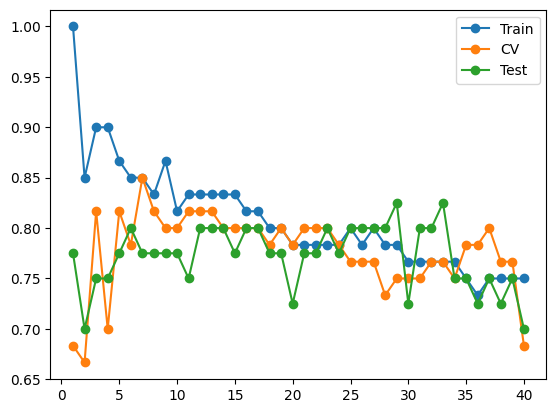

In [7]:
plt.plot(np.arange(1,41),s,marker='o')
plt.legend(('Train','CV','Test'))
plt.show()

In [8]:
# 최적의 K = 7
f = KNeighborsClassifier(7)
f.fit(xtrain,ytrain)
print( f.score(xtrain,ytrain) )
print( f.score(xtest,ytest) )

0.85
0.775


### 자동화된 파라메터 튜닝

In [9]:
# 파라메터 리스트트
params = {'n_neighbors': np.arange(2,40)}
params

{'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39])}

In [10]:
from sklearn.model_selection import GridSearchCV
f = GridSearchCV(KNeighborsClassifier(),params)
f.fit(xtrain,ytrain)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': array([ 2, 3..., 37, 38, 39])}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,np.int64(7)


In [11]:
f.best_estimator_

,n_neighbors,np.int64(7)
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [12]:
f.best_params_

{'n_neighbors': np.int64(7)}

In [13]:
print( f.score(xtrain,ytrain) )
print( f.score(xtest,ytest) )

0.85
0.775


## 변수 선택 기법

In [14]:
df = pd.read_csv('data03_carseat.csv')

In [15]:
X = df.iloc[:,2:-6]
X = pd.get_dummies(X,drop_first=True)
Y = df['Sales']
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.5,random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression
f = LinearRegression()
f.fit(xtrain,ytrain)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

0.9148283997074489 0.8707233967285177


In [17]:
# forward feature selection
np.random.seed(0)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
vn = list(xtrain.columns)
f_sel= []
score = []
for i in range(xtrain.shape[1]):
    s = np.zeros(len(vn))
    for j in range(len(vn)):
        v = f_sel.copy()
        v.append(vn[j])
        x = xtrain[v]
        f = LinearRegression()
        cv_score = cross_val_score(f,x,ytrain,cv=5)
        s[j] = cv_score.mean()
    v = vn[s.argmax()]
    f_sel.append(v)
    vn.remove(v)
    score.append(s.max())
    print("%02d Selected:"%i,f_sel)
    print("%02d Score   :"%i,np.round(10000*np.array(score))/10000)

00 Selected: ['ShelveLoc_Good']
00 Score   : [0.2564]
01 Selected: ['ShelveLoc_Good', 'Advertising']
01 Score   : [0.2564 0.3266]
02 Selected: ['ShelveLoc_Good', 'Advertising', 'CompPrice']
02 Score   : [0.2564 0.3266 0.3983]
03 Selected: ['ShelveLoc_Good', 'Advertising', 'CompPrice', 'Price']
03 Score   : [0.2564 0.3266 0.3983 0.6895]
04 Selected: ['ShelveLoc_Good', 'Advertising', 'CompPrice', 'Price', 'Age']
04 Score   : [0.2564 0.3266 0.3983 0.6895 0.7501]
05 Selected: ['ShelveLoc_Good', 'Advertising', 'CompPrice', 'Price', 'Age', 'ShelveLoc_Medium']
05 Score   : [0.2564 0.3266 0.3983 0.6895 0.7501 0.7934]
06 Selected: ['ShelveLoc_Good', 'Advertising', 'CompPrice', 'Price', 'Age', 'ShelveLoc_Medium', 'Income']
06 Score   : [0.2564 0.3266 0.3983 0.6895 0.7501 0.7934 0.8054]
07 Selected: ['ShelveLoc_Good', 'Advertising', 'CompPrice', 'Price', 'Age', 'ShelveLoc_Medium', 'Income', 'Education']
07 Score   : [0.2564 0.3266 0.3983 0.6895 0.7501 0.7934 0.8054 0.8085]
08 Selected: ['ShelveLo

In [ ]:
f_sel_final = f_sel[:-4]
f_sel_final

['ShelveLoc_Good',
 'Advertising',
 'CompPrice',
 'Price',
 'Age',
 'ShelveLoc_Medium',
 'Income']

In [ ]:
f = LinearRegression()
f.fit(xtrain[f_sel_final],ytrain)
print( f.score(xtrain[f_sel_final],ytrain), f.score(xtest[f_sel_final],ytest) )

0.904573478781004 0.8968225971797077


## 차원축소 기법

In [ ]:
df = pd.read_csv('data06_diabetes.csv')

In [ ]:
X = df.iloc[:,:-1]
Y = df['Y']
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.7,random_state=1)

### 데이터 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)

StandardScaler()

In [ ]:
pd.DataFrame( {'mean': xtrain.mean(), 'var':xtrain.var()} )

,mean,var
age,-0.004111,0.002395
sex,0.004464,0.002287
bmi,-0.003242,0.002297
map,0.001441,0.002049
tc,0.000641,0.002417
ldl,0.000474,0.002289
hdl,0.001629,0.002321
tch,0.000013,0.002573
ltg,-0.002777,0.002581
glu,-0.000984,0.002369


In [ ]:
xtrain_scaled = pd.DataFrame( scaler.transform(xtrain), columns=xtrain.columns )
pd.DataFrame( {'mean': xtrain_scaled.mean(), 'var':xtrain_scaled.var()} )

,mean,var
age,2.186803e-17,1.007634
sex,-4.710037e-17,1.007634
bmi,3.700743e-17,1.007634
map,4.037175e-17,1.007634
tc,2.691450e-17,1.007634
ldl,3.364312e-18,1.007634
hdl,-2.691450e-17,1.007634
tch,-6.728624e-17,1.007634
ltg,2.691450e-17,1.007634
glu,-4.373606e-17,1.007634


### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(xtrain_scaled)

PCA()

In [ ]:
ztrain = pd.DataFrame( pca.transform(xtrain_scaled) )
ztrain.head()

,0,1,2,3,4,5,6,7,8,9
0,-3.837211,-0.660480,-1.505722,-0.148143,-0.954471,-1.159906,0.341996,0.149461,0.067290,-0.011754
1,-3.339579,0.369037,0.389494,1.190847,-0.241617,0.405073,-0.006366,-0.330110,0.118369,-0.005172
2,-2.462659,-1.132392,-0.432283,0.488887,-1.427379,0.525006,0.179123,0.453561,0.327735,-0.052969
3,2.121938,-0.862160,-2.089667,-0.706724,0.553903,-0.339686,-0.113312,-1.091882,-0.259699,-0.021148
4,0.705181,1.363594,0.680327,-0.771072,0.144636,-0.158288,-0.920641,0.437160,-0.234625,0.033060


In [ ]:
pd.DataFrame( {'mean': ztrain.mean(), 'var':ztrain.var()} )

,mean,var
0,4.541821e-17,4.338396
1,-5.172630e-17,1.582158
2,-1.682156e-17,1.076919
3,2.523234e-17,0.868972
4,-2.397072e-17,0.650583
5,-3.196097e-17,0.594128
6,-1.261617e-17,0.454020
7,5.046468e-17,0.438675
8,1.892426e-18,0.064120
9,1.923966e-17,0.008365


### 데이터 변환

In [ ]:
# 훈련 데이터의 변환
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain_scaled = scaler.transform(xtrain)  # numpy 형식
xtrain_scaled = pd.DataFrame( xtrain_scaled  ) # pandas 형식
pca = PCA()
pca.fit(xtrain_scaled)
ztrain = pca.transform(xtrain_scaled) # numpy 형식
ztrain = pd.DataFrame( ztrain ) # pandas 형식

In [ ]:
# 평가 데이터의 변환
ztest = pca.transform( scaler.transform(xtest) )
ztest = pd.DataFrame( ztest )

### 주성분 수에 따른 성능의 변화

In [ ]:
npc = np.arange(1,ztrain.shape[1]+1)
train_r2 = []
cv_r2 = []
test_r2 = []
for n in npc:
  xx_train = ztrain.iloc[:,:n]
  xx_test = ztest.iloc[:,:n]
  f = LinearRegression()
  f.fit(xx_train,ytrain)
  train_r2.append( f.score(xx_train,ytrain) )
  cv_r2.append( cross_val_score(f,xx_train,ytrain,cv=3).mean() )
  test_r2.append( f.score(xx_test,ytest) )

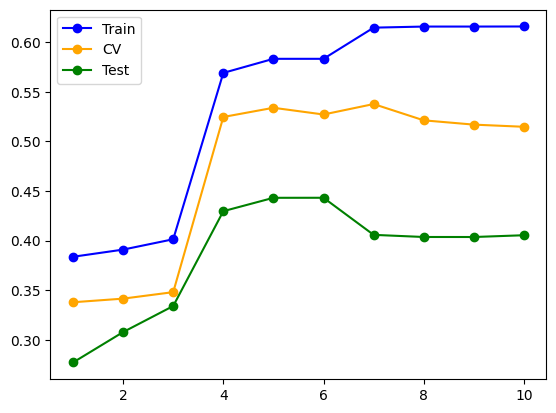

In [ ]:
plt.plot(npc,train_r2,'blue',marker='o')
plt.plot(npc,cv_r2,'orange',marker='o')
plt.plot(npc,test_r2,'green',marker='o')
plt.legend(labels=['Train','CV','Test'])
plt.show()

## 규제화 기법

### 규제화 기법을 이용한 모델 변형

In [ ]:
df = pd.read_csv('data03_carseat.csv')

In [ ]:
X = df.iloc[:,2:-6]
X = pd.get_dummies(X,drop_first=True)
Y = df['Sales']
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.5,random_state=0)

In [ ]:
# 일반적인 선형 회귀 모델델
from sklearn.linear_model import LinearRegression
f = LinearRegression()
f.fit(xtrain,ytrain)
print(f.coef_)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

[ 1.03595988e-01  1.79228444e-02  1.86839786e-01 -1.17723580e-03
 -9.30210503e-02 -5.32464044e-02 -6.37945582e-02  5.35942505e+00
  1.82442363e+00  2.83474765e-01 -6.21327031e-01]
0.9148283997074489 0.8707233967285173


In [ ]:
# L2 규제화
from sklearn.linear_model import Ridge
f = Ridge(alpha=0.5)
f.fit(xtrain,ytrain)
print(f.coef_)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

[ 1.05075308e-01  1.88349645e-02  1.89502522e-01 -7.52171350e-04
 -9.07823252e-02 -4.91439435e-02 -6.19211208e-02  4.81393621e+00
  1.51919583e+00  1.18297462e-01 -6.03798539e-01]
0.911622866980691 0.8798418944193303


In [ ]:
# L1 규제화
from sklearn.linear_model import Lasso
f = Lasso(alpha=0.5)
f.fit(xtrain,ytrain)
print(f.coef_)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

[ 1.14043241e-01  1.92695418e-02  1.71765280e-01  7.69098934e-04
 -7.62875403e-02 -2.44130681e-02 -0.00000000e+00  1.14779138e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
0.6990527820891633 0.6532997911656879


In [ ]:
xtrain.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age',
       'Education', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_Yes',
       'US_Yes'],
      dtype='object')

### 규제화 기법에서의 파라메터 튜닝

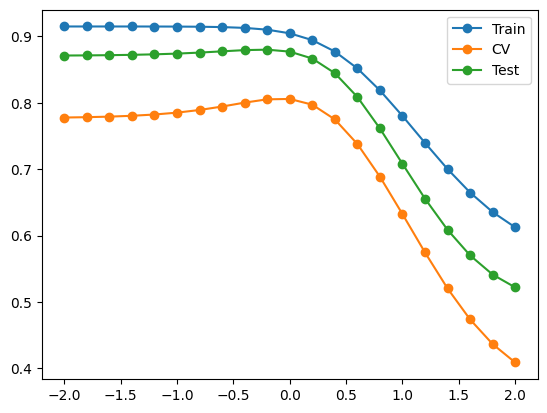

In [ ]:
# select parameter using cross-validation
np.random.seed(0)
from sklearn.model_selection import cross_val_score
exp = np.linspace(-2,2,21)
alphas = 10**exp
s = np.zeros((len(alphas),3))
for n in range(s.shape[0]):
    f = Ridge(alpha=alphas[n])
    f.fit(xtrain,ytrain)
    s[n,0] = f.score(xtrain,ytrain)
    s[n,1] = cross_val_score(f,xtrain,ytrain,cv=5).mean()
    s[n,2] = f.score(xtest,ytest)

plt.plot(exp,s[:,0],exp,s[:,1],exp,s[:,2],marker='o')
plt.legend(('Train','CV','Test'))
plt.show()

In [ ]:
params = {'alpha': 10**np.linspace(-2,2,21)}
f = GridSearchCV(Ridge(),params)
f.fit(xtrain,ytrain)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-02, 1.58489319e-02, 2.51188643e-02, 3.98107171e-02,
       6.30957344e-02, 1.00000000e-01, 1.58489319e-01, 2.51188643e-01,
       3.98107171e-01, 6.30957344e-01, 1.00000000e+00, 1.58489319e+00,
       2.51188643e+00, 3.98107171e+00, 6.30957344e+00, 1.00000000e+01,
       1.58489319e+01, 2.51188643e+01, 3.98107171e+01, 6.30957344e+01,
       1.00000000e+02])})

In [ ]:
print(f.best_estimator_)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

Ridge()
0.9045558674746755 0.8769813900955272


In [ ]:
params = {'alpha': 10**np.linspace(-2,2,21)}
f = GridSearchCV(Lasso(),params)
f.fit(xtrain,ytrain)
print(f.best_estimator_)
print( f.score(xtrain,ytrain), f.score(xtest,ytest) )

Lasso(alpha=0.039810717055349734)
0.9085954802530518 0.8814781926795952


In [ ]:
f.best_estimator_.coef_

array([ 1.04044243e-01,  1.82885500e-02,  1.68838203e-01, -7.24964791e-04,
       -9.02660600e-02, -4.71140770e-02, -5.10239372e-02,  4.76987513e+00,
        1.39162376e+00,  0.00000000e+00, -2.76195583e-01])

## 연습문제

1. diabetes 데이터 셋에 KNN을 적용하였을 때 최적의 K값을 찾으시오. 그 때의 성능은 얼마인가?

최적의 k가 2다

In [21]:
df = pd.read_csv('data06_diabetes.csv')
X = df.iloc[:,:-1]
Y = df['Y']
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.5,random_state=0)

c:\Users\osm13\test\data\Lib\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")
c:\Users\osm13\test\data\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
c:\Users\osm13\test\data\Lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
c:\Users\osm13\test\data\Lib\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes i

=== Plain KNN (Scaled) ===
K 후보군: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
최적 K: 2
CV 평균 정확도: 0.0136
테스트 정확도: 0.0000


c:\Users\osm13\test\data\Lib\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")
c:\Users\osm13\test\data\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
c:\Users\osm13\test\data\Lib\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")
c:\Users\osm13\test\data\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater tha

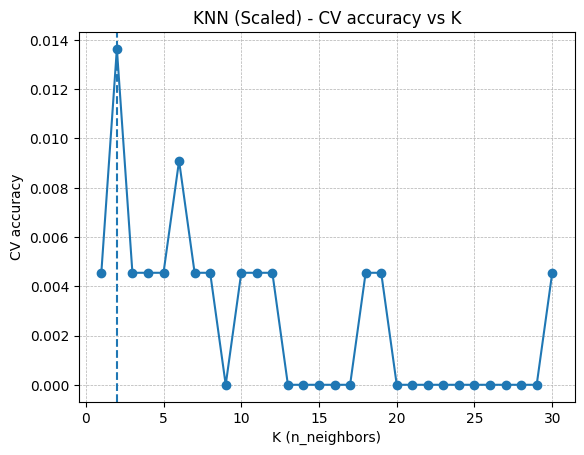

c:\Users\osm13\test\data\Lib\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")
c:\Users\osm13\test\data\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
c:\Users\osm13\test\data\Lib\site-packages\sklearn\metrics\_classification.py:99: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_pred = type_of_target(y_pred, input_name="y_pred")
c:\Users\osm13\test\data\Lib\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes i


=== PCA + KNN (Forward Stepwise over components) ===
PCA 컴포넌트 후보군: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
최적 컴포넌트 m: 1
m=1에서 최적 K: 24
CV 평균 정확도: 0.0181
테스트 정확도: 0.0000


c:\Users\osm13\test\data\Lib\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")
c:\Users\osm13\test\data\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  type_true = type_of_target(y_true, input_name="y_true")
c:\Users\osm13\test\data\Lib\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples. `y` could represent a regression problem, not a classification problem.
  y_type = type_of_target(y, input_name="y")
c:\Users\osm13\test\data\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater tha

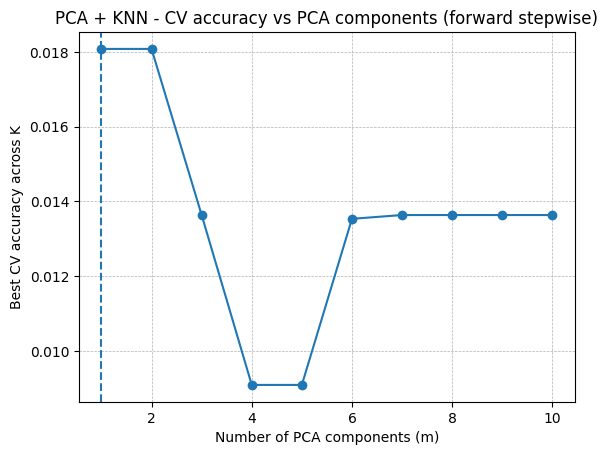

In [23]:
# knn_diabetes_stepwise.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# 1) 데이터 로드
df = pd.read_csv('data06_diabetes.csv')  # 파일 경로 확인
X = df.iloc[:, :-1]
y = df.iloc[:, -1] if 'Y' not in df.columns else df['Y']

# 2) 50:50 분할 (stratify 제거)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.5, random_state=0)

# 3) KFold 교차검증
cv = KFold(n_splits=5, shuffle=True, random_state=0)

# -------------------------------------------
# A. Plain KNN (Scaling) - K 후보군 & 성능 개형
# -------------------------------------------
K_list = list(range(1, 31))

pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

grid_knn = GridSearchCV(
    pipe_knn,
    param_grid={'knn__n_neighbors': K_list},
    scoring='accuracy',
    cv=cv,
    refit=True
)
grid_knn.fit(Xtr, ytr)

# K별 CV 평균 정확도 추출
cv_means = []
for k in K_list:
    m = grid_knn.cv_results_['param_knn__n_neighbors'] == k
    cv_means.append(grid_knn.cv_results_['mean_test_score'][m][0])

best_k_plain = grid_knn.best_params_['knn__n_neighbors']
best_cv_plain = grid_knn.best_score_
test_acc_plain = accuracy_score(yte, grid_knn.best_estimator_.predict(Xte))

print("=== Plain KNN (Scaled) ===")
print(f"K 후보군: {K_list}")
print(f"최적 K: {best_k_plain}")
print(f"CV 평균 정확도: {best_cv_plain:.4f}")
print(f"테스트 정확도: {test_acc_plain:.4f}")

# 성능 개형도
plt.figure()
plt.plot(K_list, cv_means, marker='o')
plt.axvline(best_k_plain, linestyle='--')
plt.title('KNN (Scaled) - CV accuracy vs K')
plt.xlabel('K (n_neighbors)')
plt.ylabel('CV accuracy')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

# --------------------------------------------------------
# B. PCA + KNN : Forward Stepwise(컴포넌트 1→M 순차 확장)
#   - 각 m에 대해 K 후보군 중 최고 CV 정확도 기록
#   - 가장 높은 CV 정확도를 주는 m 선택
# --------------------------------------------------------
max_pca = min(10, Xtr.shape[1])           # 필요시 상한 조정
m_list = list(range(1, max_pca + 1))

m_cv_scores = []
m_best_k = []

for m in m_list:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=m, svd_solver='full', random_state=0)),
        ('knn', KNeighborsClassifier())
    ])
    g = GridSearchCV(
        pipe,
        param_grid={'knn__n_neighbors': K_list},
        scoring='accuracy',
        cv=cv,
        refit=True
    )
    g.fit(Xtr, ytr)
    m_cv_scores.append(g.best_score_)
    m_best_k.append(g.best_params_['knn__n_neighbors'])

best_idx = int(np.argmax(m_cv_scores))
best_m = m_list[best_idx]
best_k_pca = m_best_k[best_idx]
best_cv_pca = m_cv_scores[best_idx]

final_pca_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=best_m, svd_solver='full', random_state=0)),
    ('knn', KNeighborsClassifier(n_neighbors=best_k_pca))
])
final_pca_knn.fit(Xtr, ytr)
test_acc_pca = accuracy_score(yte, final_pca_knn.predict(Xte))

print("\n=== PCA + KNN (Forward Stepwise over components) ===")
print(f"PCA 컴포넌트 후보군: {m_list}")
print(f"최적 컴포넌트 m: {best_m}")
print(f"m={best_m}에서 최적 K: {best_k_pca}")
print(f"CV 평균 정확도: {best_cv_pca:.4f}")
print(f"테스트 정확도: {test_acc_pca:.4f}")

# m별 최고 CV 정확도 개형도
plt.figure()
plt.plot(m_list, m_cv_scores, marker='o')
plt.axvline(best_m, linestyle='--')
plt.title('PCA + KNN - CV accuracy vs PCA components (forward stepwise)')
plt.xlabel('Number of PCA components (m)')
plt.ylabel('Best CV accuracy across K')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()


2. diabetes 데이터 셋에 Lasso를 적용하였을 때 최적의 alpha 값을 찾으시오. 그 때 선택된 변수는 어떤 것들인가? 그 때의 성능은 일반적인 선형회귀와 비교하여 얼마나 개선되었나?

성능이 아주 조금 개선 되었다

===

- 테스트 MSE = 3051.2509
- Baseline MSE = 3075.3333

===


=> 24정도 에러가 줄음

In [24]:
df = pd.read_csv('data06_diabetes.csv')
X = df.iloc[:,:-1]
Y = df['Y']
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.5,random_state=0)

In [25]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# 1) 데이터 로드
df = pd.read_csv("data06_diabetes.csv")
X = df.iloc[:, :-1]
y = df["Y"] if "Y" in df.columns else df.iloc[:, -1]

# 2) train/test split
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.5, random_state=0)

# 3) 베이스라인 (선형회귀)
pipe_lin = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])
pipe_lin.fit(Xtr, ytr)
y_pred_lin = pipe_lin.predict(Xte)
mse_lin = mean_squared_error(yte, y_pred_lin)
r2_lin = r2_score(yte, y_pred_lin)

# 4) LassoCV (alpha 자동 탐색)
alphas = np.logspace(-4, 2, 60)
pipe_lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LassoCV(alphas=alphas, cv=5, max_iter=10000, random_state=0))
])
pipe_lasso.fit(Xtr, ytr)

# 5) 결과 확인
best_alpha = pipe_lasso.named_steps["model"].alpha_
coef = pipe_lasso.named_steps["model"].coef_
selected_idx = np.where(np.abs(coef) > 1e-8)[0]
selected_features = list(X.columns[selected_idx])

y_pred_lasso = pipe_lasso.predict(Xte)
mse_lasso = mean_squared_error(yte, y_pred_lasso)
r2_lasso = r2_score(yte, y_pred_lasso)

print("=== Lasso (L1) 결과 ===")
print(f"최적 alpha: {best_alpha:.6f}")
print(f"선택된 변수({len(selected_features)}개): {selected_features}")
print(f"테스트 MSE: {mse_lasso:.4f}")
print(f"테스트 R²: {r2_lasso:.4f}")

print("\n=== 선형회귀 비교 ===")
print(f"Baseline MSE: {mse_lin:.4f}")
print(f"Baseline R²: {r2_lin:.4f}")
print(f"MSE 개선량: {mse_lin - mse_lasso:.4f}")


=== Lasso (L1) 결과 ===
최적 alpha: 1.867181
선택된 변수(6개): ['sex', 'bmi', 'map', 'tc', 'hdl', 'ltg']
테스트 MSE: 3051.2509
테스트 R²: 0.4422

=== 선형회귀 비교 ===
Baseline MSE: 3075.3333
Baseline R²: 0.4377
MSE 개선량: 24.0824


3. 아래의 코드는 당뇨 데이터 셋을 분류문제로 변경한 것이다. 여기에 로지스틱 회귀 모델을 적용하여 분류 모델을 만들고자 한다. 로지스틱 회귀 모델에서 사용되는 sklearn.linear_model.LogisticRegression에는 C라는 파라메터가 있는데, 이 파라메터의 사용법을 검색을 통해 알아보고, 튜닝하시오.

Logistic Regression에서 규제 강도 C를 튜닝한 결과, 최적 C는 1.0으로 나타났다.

이는 너무 강하거나 약한 규제보다 중간 수준의 규제가 가장 일반화 성능이 좋다는 것을 의미한다.

테스트 정확도는 약 0.7466으로, 혼동행렬에서 FP와 FN이 균형 있게 분포해 안정적인 분류가 이뤄졌다.

또한 분류 문제이므로 회귀와 달리 MSE가 아닌 정확도·정밀도·재현율을 활용해 성능을 평가한다.

In [37]:
df = pd.read_csv('data06_diabetes.csv')
X = df.iloc[:,:-1]
Y_numeric = df['Y']
Y = [ 'Neg' if Y_numeric[i]<140 else 'Pos' for i in range(len(Y_numeric)) ]
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.5,random_state=0)

In [26]:
# Q3. 당뇨 데이터셋 이진 분류(Logistic Regression) + C 튜닝

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1) 데이터 로드 & 이진 라벨 생성 (예: Y < 140 -> 'Neg', 그 외 'Pos')
df = pd.read_csv("data06_diabetes.csv")
X = df.iloc[:, :-1]
Y_numeric = df["Y"] if "Y" in df.columns else df.iloc[:, -1]
y = np.where(Y_numeric < 140, "Neg", "Pos")

# 2) 50:50 분할 (계층 추출)
Xtr, Xte, ytr, yte = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y
)

# 3) 파이프라인: 표준화 + 로지스틱회귀
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(solver="liblinear", max_iter=2000))  # 기본 L2 규제
])

# 4) 하이퍼파라미터 튜닝: C (작을수록 규제 강함)
param_grid = {
    "logreg__C": np.logspace(-3, 3, 13)  # 0.001 ~ 1000
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
grid = GridSearchCV(pipe, param_grid, scoring="accuracy", cv=cv, refit=True)
grid.fit(Xtr, ytr)

# 5) 결과
best_C = grid.best_params_["logreg__C"]
best_cv = grid.best_score_

y_pred = grid.best_estimator_.predict(Xte)
test_acc = accuracy_score(yte, y_pred)
cm = confusion_matrix(yte, y_pred)
rep = classification_report(yte, y_pred, digits=4)

print("=== Logistic Regression (Binary) ===")
print(f"최적 C: {best_C}")
print(f"CV 평균 정확도: {best_cv:.4f}")
print(f"테스트 정확도: {test_acc:.4f}")
print("혼동행렬:\n", cm)
print("분류 리포트:\n", rep)


=== Logistic Regression (Binary) ===
최적 C: 1.0
CV 평균 정확도: 0.7553
테스트 정확도: 0.7466
혼동행렬:
 [[81 29]
 [27 84]]
분류 리포트:
               precision    recall  f1-score   support

         Neg     0.7500    0.7364    0.7431       110
         Pos     0.7434    0.7568    0.7500       111

    accuracy                         0.7466       221
   macro avg     0.7467    0.7466    0.7466       221
weighted avg     0.7467    0.7466    0.7466       221

